In [ ]:
from Backtest_Incremental import *
### All the functions that are used in this notebook come from Backtest_Incremental

### Projet ML For Portfolio Management

The paper presented by Vrontos, Galakis and Vrontros, focuses on the
modelling and prediction of the fear index using a statistical learning procedure
learning procedure, namely a classification model.
The final aim of this article is to predict the monthly evolution of the VIX, either up or down, based on panel data
of about thirty market and economic variables. This approach
approach allows us to focus on the directionality of the VIX rather than its level
level, which is sufficient to propose investment strategies.


The data used by the authors are on a monthly basis. This
choice of granularity allows the incorporation of economic and sentiment variables
variables that are only available at low frequency.  The datas we used were imported via Bloomberg.

Several types of data are included in the model:
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Market data: Oil, short rates, long rates ...  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Factors: Momentum, HML, SMB, Market ...  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Indicators: Bull sentiment, Neutral sentiment, Economic policy uncertainty index ...  

We tried to contribute by adding the Hurst exponent to this dataset. The explanation of the Hurst exponent can be found in the notebook 'Hurst.IPYNB'.

In this paper, a lot of techniques have been implemented. Here we decided to present 2 of them (Logistic regression and random forest) because the training time for some algorithms can take several hours. But other methods can be tested by selecting a model in 'models' and the corresponding grid in 'grids' at the end of this notebook.

These models are trained and validated recursively as in the article.

The proposed algorithm is briefly presented below:   
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1) Set the out-of-sample period P.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2) For iteration = 1, . . . , P  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a) Specify the estimation window, which is updated
based on a recursive (expanding) scheme  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b) Apply the Elastic Net regularization approach and
identify the important predictors  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(c) Implement the proposed modeling approaches, i.e.
the machine learning techniques and the standard
predictive models  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(d) Compute VIX directional one-step ahead forecasts  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(e) Construct different investment strategies  

Then we apply the prediction to strategies.  
In the paper 3 strategies are implemented, the first one is long vix only, the second is long short vix and the last one is long only SP500. These strategies are descirbed in 'Backtest_Incremental.py'

### I) Datas without hurst exponent

In [2]:
data_ = Data_Initialisation()
X_train, X_test, y_train, y_test, Vix, Sp500 = data_.preprocessed_time_serie_split()

### A) Random Forest

In [3]:
Portfolios_Rf = [Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31')]

In [4]:
models = [
    ('Random_Frst',RandomForestClassifier())]
grids = {
    'Random_Frst':{'n_estimators':[5,20,50,100],
                         'max_depth':[5,7,10,12,15],
                         'min_samples_split':[2,4,6],
                         'min_samples_leaf':[1,2,3,4,5],
                         'max_features':['sqrt', 'log2'],
                        }}
Backtest_rf = Backtester(models, grids, Portfolios_Rf)

### i) elastic net alpha = 0.5 

100%|██████████████████████████████████████████████████████████████████████████████| 211/211 [1:22:30<00:00, 21.08s/it]


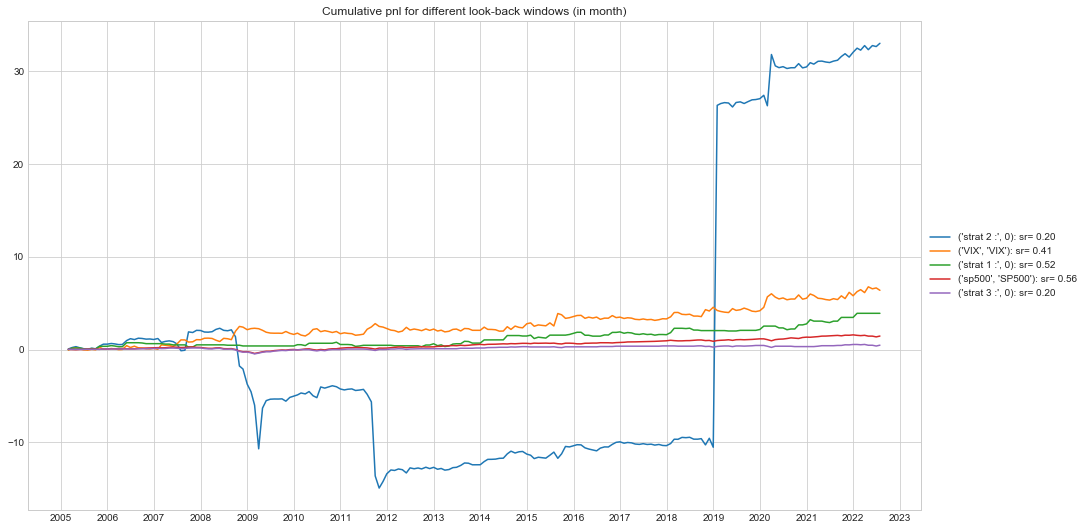

In [5]:
Backtest_rf.incremental_learning(X_train, y_train, X_test, y_test, Vix, Sp500, alpha = 0.5)
Backtest_rf.plot_pnl(Sp500, Vix)

Here we can see that among our 3 strategies, the one with the best sharpe ratio is strategy 1 (long only VIX) (0.52). We can see that this strategy has a better sharpe ratio than the Vix (0.41).  This strategy outperforms its benchmark. Strategy 2 (long-short vix) and strategy 3 (long sp500), have a sharpe ratio of 0.2. Strategy 2, however, is experiencing very strong positive returns in early 2019. The vix has collapsed at this time, so the strategy seems to be very short vix at this time. It also has very positive returns in early 2020 when the covid crisis starts. The VIX, representing the fear on the markets, had exploded during this period, the strategy seems to be very long VIX.

Strategy 1 (long vix) is the best of the 3, returns seem to grow throughout history in addition to beating the sharpe ratio of its benchmark

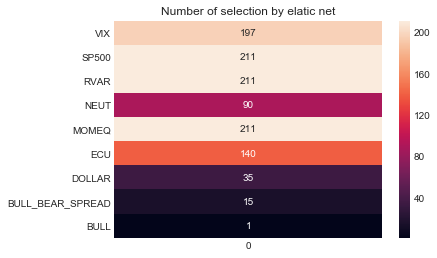

In [6]:
Backtest_rf.heatmap_features()

Here we can see that out of the 32 variables, the elastic net kept 9.  
3 variables were used at each iteration, SP500, RVAR and MOMEQ

### ii) elastic net alpha = 0.75



  0%|                                                                                          | 0/211 [00:00<?, ?it/s]

  0%|▍                                                                               | 1/211 [00:22<1:18:29, 22.42s/it]

  1%|▊                                                                               | 2/211 [00:47<1:20:32, 23.12s/it]

  1%|█▏                                                                              | 3/211 [01:12<1:22:18, 23.74s/it]

  2%|█▌                                                                              | 4/211 [01:37<1:22:52, 24.02s/it]

  2%|█▉                                                                              | 5/211 [01:59<1:20:28, 23.44s/it]

  3%|██▎                                                                             | 6/211 [02:20<1:17:47, 22.77s/it]

  3%|██▋                                                                             | 7/211 [02:41<1:15:50, 22.30s/it]

  4%|███                      

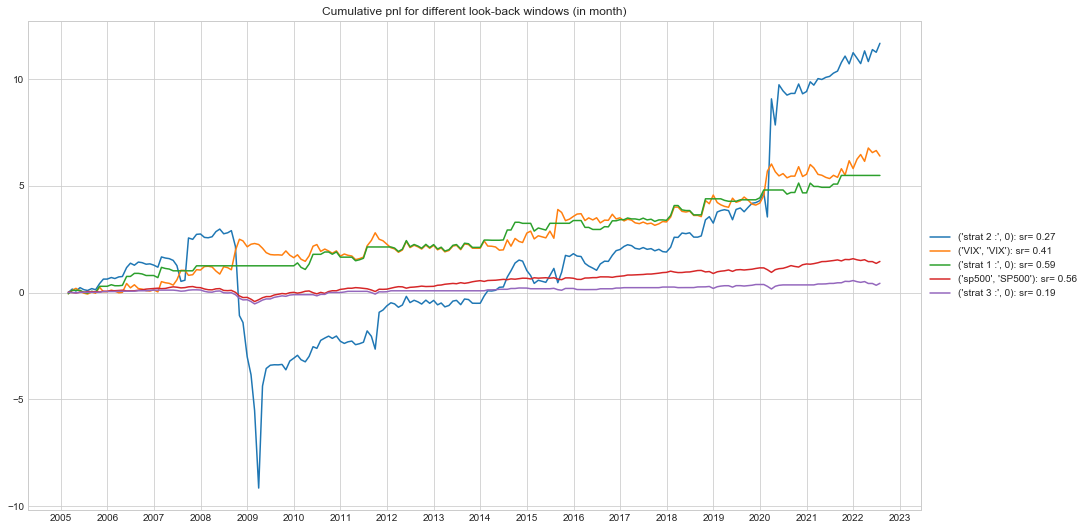

In [9]:
data_ = Data_Initialisation()
X_train, X_test, y_train, y_test, Vix, Sp500 = data_.preprocessed_time_serie_split()
Portfolios_Rf = [Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31')]
Backtest_rf_075 = Backtester(models, grids, Portfolios_Rf)
Backtest_rf_075.incremental_learning(X_train, y_train, X_test, y_test, Vix, Sp500, alpha = 0.75)
Backtest_rf_075.plot_pnl(Sp500, Vix)

Here, the observation remains broadly the same as when alpha = 0.5.   
Strategy 1 remains the best with a slightly higher sharpe ratio (0.59 against 0.52 previously). Concerning strategy 2 its sharpe ratio remains low (0.27).  
However, we can notice that its returns are very increasing after the crisis of 2008-2009.

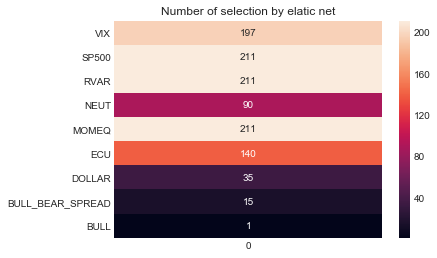

In [10]:
Backtest_rf_075.heatmap_features()

Here we can see that out of the 32 variables, the elastic net kept 9.  
3 variables were used at each iteration, SP500, RVAR and MOMEQ

### B) Logistic Regression

In [13]:
data_ = Data_Initialisation()
X_train, X_test, y_train, y_test, Vix, Sp500 = data_.preprocessed_time_serie_split()
Portfolios_log_reg = [Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31')]
models = [
    ('RIDGE_AUC',LogisticRegression())]
grids = {
    'RIDGE_AUC':{'solver':['newton-cg','lbfgs','liblinear','sag','saga']}}
Backtest_log_reg = Backtester(models, grids, Portfolios_log_reg)

### i) elastic net alpha = 0.5 




  0%|                                                                                          | 0/211 [00:00<?, ?it/s]


  0%|▍                                                                                 | 1/211 [00:04<16:54,  4.83s/it]


  1%|▊                                                                                 | 2/211 [00:04<11:55,  3.42s/it]


  1%|█▏                                                                                | 3/211 [00:05<08:28,  2.45s/it]


  2%|█▌                                                                                | 4/211 [00:05<06:03,  1.76s/it]


  2%|█▉                                                                                | 5/211 [00:05<04:22,  1.28s/it]


  3%|██▎                                                                               | 6/211 [00:05<03:11,  1.07it/s]


  3%|██▋                                                                               | 7/211 [00:05<02:23,  1.42it/s]


  4%|███             

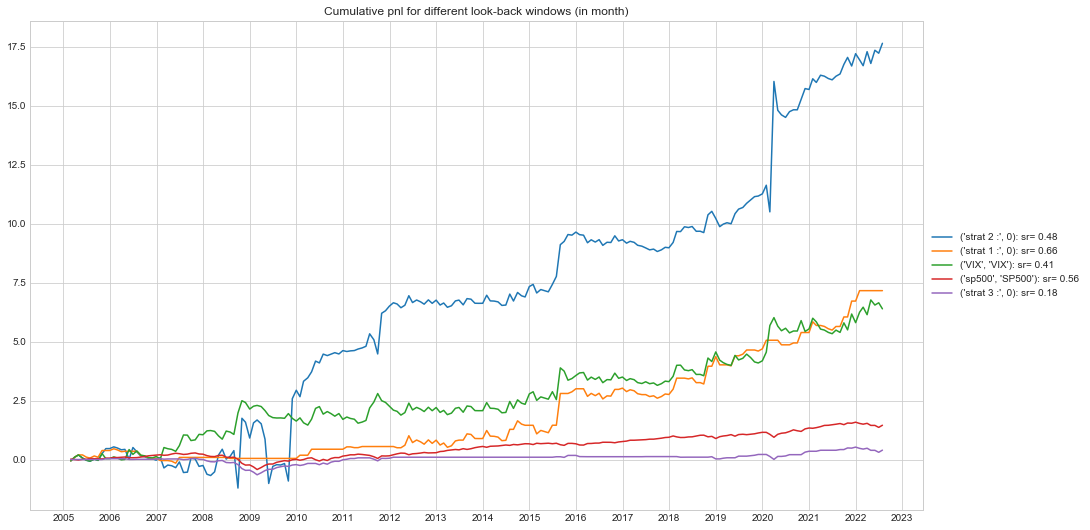

In [14]:
Backtest_log_reg.incremental_learning(X_train, y_train, X_test, y_test, Vix, Sp500, alpha = 0.5)
Backtest_log_reg.plot_pnl(Sp500, Vix)

The results of the logistic regression seem to be much better than those of the random forest. Strategy 1 has the best sharpe ratio (0.66 against 0.51 for the random forest). Strategy 2 has a much better sharpe ratio as well (0.48 versus 0.2). Moreover, its results are very strongly positive after the crisis of 2008-2009

### ii) alpha = 0.75




  0%|                                                                                          | 0/211 [00:00<?, ?it/s]


  0%|▍                                                                                 | 1/211 [00:00<00:39,  5.26it/s]


  1%|▊                                                                                 | 2/211 [00:00<00:37,  5.61it/s]


  1%|█▏                                                                                | 3/211 [00:00<00:36,  5.66it/s]


  2%|█▌                                                                                | 4/211 [00:00<00:35,  5.86it/s]


  2%|█▉                                                                                | 5/211 [00:00<00:37,  5.52it/s]


  3%|██▎                                                                               | 6/211 [00:01<00:37,  5.46it/s]


  3%|██▋                                                                               | 7/211 [00:01<00:37,  5.46it/s]


  4%|███             

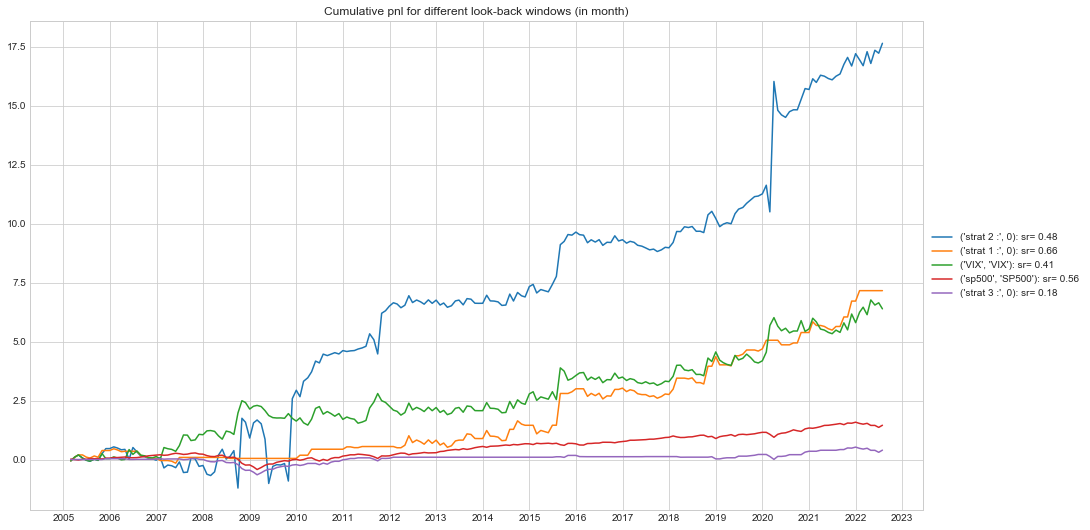

In [15]:
data_ = Data_Initialisation()
X_train, X_test, y_train, y_test, Vix, Sp500 = data_.preprocessed_time_serie_split()
Portfolios_log_reg = [Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31')]
Backtest_log_reg_075 = Backtester(models, grids, Portfolios_log_reg)
Backtest_log_reg_075 .incremental_learning(X_train, y_train, X_test, y_test, Vix, Sp500, alpha = 0.75)
Backtest_log_reg_075 .plot_pnl(Sp500, Vix)

With elastic net alpha =0.75, The results of the logistic regression are the same as when alpha = 0.5

### II) Datas with hurst exponent

In [19]:
data_ = Data_Initialisation(hurst = True)
X_train, X_test, y_train, y_test, Vix, Sp500 = data_.preprocessed_time_serie_split()
Portfolios_log_reg = [Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31'), Portfolio(1, '2005-01-31')]
Backtest_log_reg = Backtester(models, grids, Portfolios_log_reg)

### A) Logistic Regrssion




  0%|                                                                                          | 0/211 [00:00<?, ?it/s]


  0%|▍                                                                                 | 1/211 [00:00<00:41,  5.10it/s]


  1%|▊                                                                                 | 2/211 [00:00<00:37,  5.51it/s]


  1%|█▏                                                                                | 3/211 [00:00<00:36,  5.65it/s]


  2%|█▌                                                                                | 4/211 [00:00<00:34,  5.96it/s]


  2%|█▉                                                                                | 5/211 [00:00<00:35,  5.85it/s]


  3%|██▎                                                                               | 6/211 [00:01<00:35,  5.80it/s]


  3%|██▋                                                                               | 7/211 [00:01<00:34,  5.83it/s]


  4%|███             

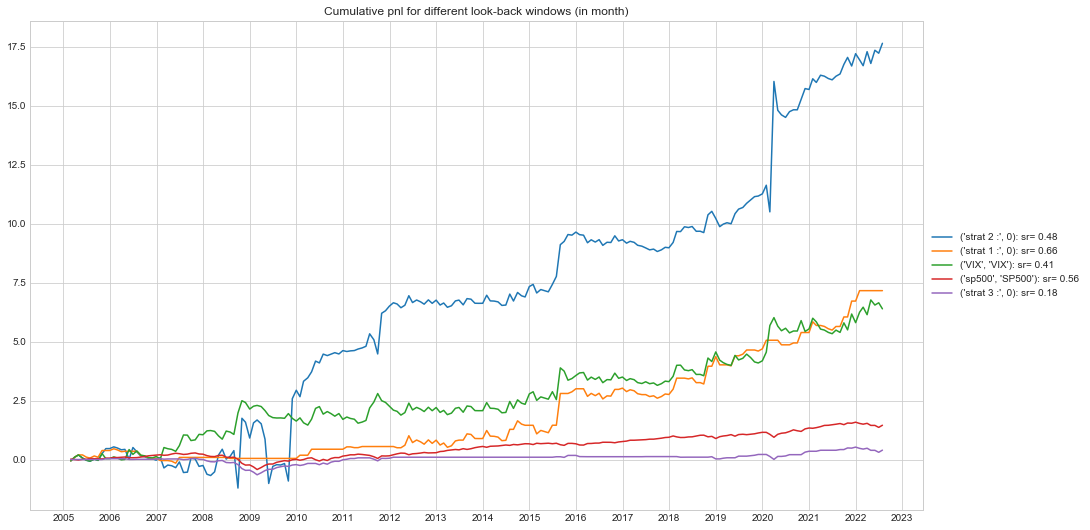

In [20]:
Backtest_log_reg.incremental_learning(X_train, y_train, X_test, y_test, Vix, Sp500, alpha = 0.5)
Backtest_log_reg.plot_pnl(Sp500, Vix)

The results are exactly the same as when the hurst exponent was not in the dataset. Unfortunately, the hurst exponent does not seem to provide any information

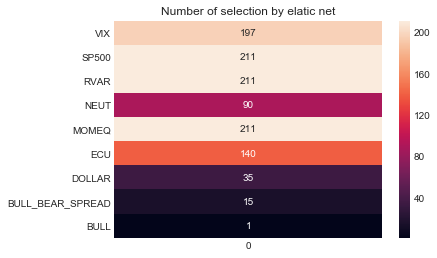

In [18]:
Backtest_log_reg.heatmap_features()

 Looking at the heatmap, we can unfortunately see that the hurst exponent is never used,  
 so it does not improve performance and there is no need to try other algorithms

### III) Other models and grids

Here are the other models implemented in the article

In [ ]:
models = [
    ('RIDGE_AUC',LogisticRegression()),
          ('RIDGE_Class',LogisticRegression()),
          ('RIDGE_Dev',LogisticRegression()),
       ('LASSO_AUC',LogisticRegression(penalty='l1')),
    ("LIGHTGBM",LGBMClassifier()),
          ('LASSO_Class',LogisticRegression(penalty='l1')),
          ('LASSO_Dev',LogisticRegression(penalty='l1')),
          ('Naive_B',BernoulliNB()),
          ('Bagging_Classfer',BaggingClassifier()),
          ('Random_Frst',RandomForestClassifier()),
          ('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
          ('GradientB_class',GradientBoostingClassifier()),
          ('KNearest_Neigh',KNeighborsClassifier()),
          ("xgboost",  XGBClassifier(min_child_weight=0,\
                       gamma=0, subsample=0.7,\
                       colsample_bytree=1.0,\
                       objective='reg:squarederror', nthread=-1,\
                       scale_pos_weight=1, seed=27,\
                       reg_alpha=0.00006))
         ]

grids = {
    'RIDGE_AUC':{'solver':['newton-cg','lbfgs','liblinear','sag','saga']},
         'RIDGE_Class':{'solver':['newton-cg','lbfgs','liblinear','sag','saga']},
         'RIDGE_Dev':{'solver':['newton-cg','lbfgs','liblinear','sag','saga']},
        'LASSO_AUC':{'solver':['liblinear','saga']},
            "LIGHTGBM":{"boosting_type " : ["gbdt","dart"],
                       "num_leaves": [100,150],
                        "learning_rate " : [0.01,0.2,0.3]
                       },
         'LASSO_Class':{'solver':['liblinear','saga']},
         'LASSO_Dev':{'solver':['liblinear','saga']},
         'Naive_B':{'alpha':[0.2,0.4,0.6,0.8]},
         'Bagging_Classfer':{'n_estimators':[10,100,1000]},
         'Random_Frst':{'n_estimators':[5,20,50,100],
                         'max_depth':[5,7,10,12,15],
                         'min_samples_split':[2,4,6],
                         'min_samples_leaf':[1,2,3,4,5],
                         'max_features':['sqrt', 'log2'],
                        },
         'adaboost' : {'n_estimators': [100,300,500],
               'learning_rate' :[0.1,0.5,1.0],
               'base_estimator__max_depth':[i for i in range(2,7,2)], #Pour atteindre les paramètres du WL
               'base_estimator__min_samples_leaf' :[0.01]},
         'KNearest_Neigh':{'leaf_size':list(range(1,50)),
                           'n_neighbors':list(range(1,30)),
                           'p':[1,2]},
         'GradientB_class':{'learning_rate': [0.01,0.05,0.1],
                  'subsample'    : [1.0,0.9, 0.8],
                  'n_estimators' : [300,500],      
                  'max_depth'    : [3,5]},
         'xgboost' : { 'max_depth': [2,4, 6],
                        'n_estimators': [1000, 3000, 5000],
                        'learning_rate': [0.09, 0.1,0.11]}
        }